In [1]:
#I had used this data before, however somehow it got messed up. Now I am cleaning it up and analyzing further.
install.packages('tidyverse')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
global_data <- read.csv('/kaggle/input/global-data-on-sustainable-energy/global-data-on-sustainable-energy (1).csv')

head(global_data)


,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


In [3]:
colnames(global_data)

[1] "Entity"                                                          
 [2] "Year"                                                            
 [3] "Access.to.electricity....of.population."                         
 [4] "Access.to.clean.fuels.for.cooking"                               
 [5] "Renewable.electricity.generating.capacity.per.capita"            
 [6] "Financial.flows.to.developing.countries..US..."                  
 [7] "Renewable.energy.share.in.the.total.final.energy.consumption...."
 [8] "Electricity.from.fossil.fuels..TWh."                             
 [9] "Electricity.from.nuclear..TWh."                                  
[10] "Electricity.from.renewables..TWh."                               
[11] "Low.carbon.electricity....electricity."                          
[12] "Primary.energy.consumption.per.capita..kWh.person."              
[13] "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."     
[14] "Value_co2_emissions_kt_by_country"                               
[15] "Renewables....equivalent.primary.energy."                        
[16] "gdp_growth"                                                      
[17] "gdp_per_capita"                                                  
[18] "Density.n.P.Km2."                                                
[19] "Land.Area.Km2."                                                  
[20] "Latitude"                                                        
[21] "Longitude"

In [4]:
library(dplyr)

data <- global_data %>%
  select(-Latitude, -Longitude, -Land.Area.Km2.) 

col_names <- colnames(data)
print(col_names)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




 [1] "Entity"                                                          
 [2] "Year"                                                            
 [3] "Access.to.electricity....of.population."                         
 [4] "Access.to.clean.fuels.for.cooking"                               
 [5] "Renewable.electricity.generating.capacity.per.capita"            
 [6] "Financial.flows.to.developing.countries..US..."                  
 [7] "Renewable.energy.share.in.the.total.final.energy.consumption...."
 [8] "Electricity.from.fossil.fuels..TWh."                             
 [9] "Electricity.from.nuclear..TWh."                                  
[10] "Electricity.from.renewables..TWh."                               
[11] "Low.carbon.electricity....electricity."                          
[12] "Primary.energy.consumption.per.capita..kWh.person."              
[13] "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."     
[14] "Value_co2_emissions_kt_by_country"                        

In [5]:
data <- global_data %>%
  select(Entity, Year, Access.to.electricity....of.population., Renewable.energy.share.in.the.total.final.energy.consumption...., Electricity.from.fossil.fuels..TWh., Electricity.from.nuclear..TWh., Electricity.from.renewables..TWh., Low.carbon.electricity....electricity.)
col_names <- colnames(data)
print(col_names)

[1] "Entity"                                                          
[2] "Year"                                                            
[3] "Access.to.electricity....of.population."                         
[4] "Renewable.energy.share.in.the.total.final.energy.consumption...."
[5] "Electricity.from.fossil.fuels..TWh."                             
[6] "Electricity.from.nuclear..TWh."                                  
[7] "Electricity.from.renewables..TWh."                               
[8] "Low.carbon.electricity....electricity."                          


In [6]:
countries <- global_data %>%
  rename(Countries = Entity)

countries <- countries %>%
  select(Countries, Year, Access.to.electricity....of.population., Renewable.energy.share.in.the.total.final.energy.consumption...., Electricity.from.fossil.fuels..TWh., Electricity.from.nuclear..TWh., Electricity.from.renewables..TWh., Low.carbon.electricity....electricity.)

col_names <- colnames(countries)
print(col_names)


[1] "Countries"                                                       
[2] "Year"                                                            
[3] "Access.to.electricity....of.population."                         
[4] "Renewable.energy.share.in.the.total.final.energy.consumption...."
[5] "Electricity.from.fossil.fuels..TWh."                             
[6] "Electricity.from.nuclear..TWh."                                  
[7] "Electricity.from.renewables..TWh."                               
[8] "Low.carbon.electricity....electricity."                          


In [7]:
united_states_data <- countries %>%
  filter(Countries == "United States")

print(united_states_data)


       Countries Year Access.to.electricity....of.population.
1  United States 2000                                     100
2  United States 2001                                     100
3  United States 2002                                     100
4  United States 2003                                     100
5  United States 2004                                     100
6  United States 2005                                     100
7  United States 2006                                     100
8  United States 2007                                     100
9  United States 2008                                     100
10 United States 2009                                     100
11 United States 2010                                     100
12 United States 2011                                     100
13 United States 2012                                     100
14 United States 2013                                     100
15 United States 2014                                     100
16 Unite

In [8]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



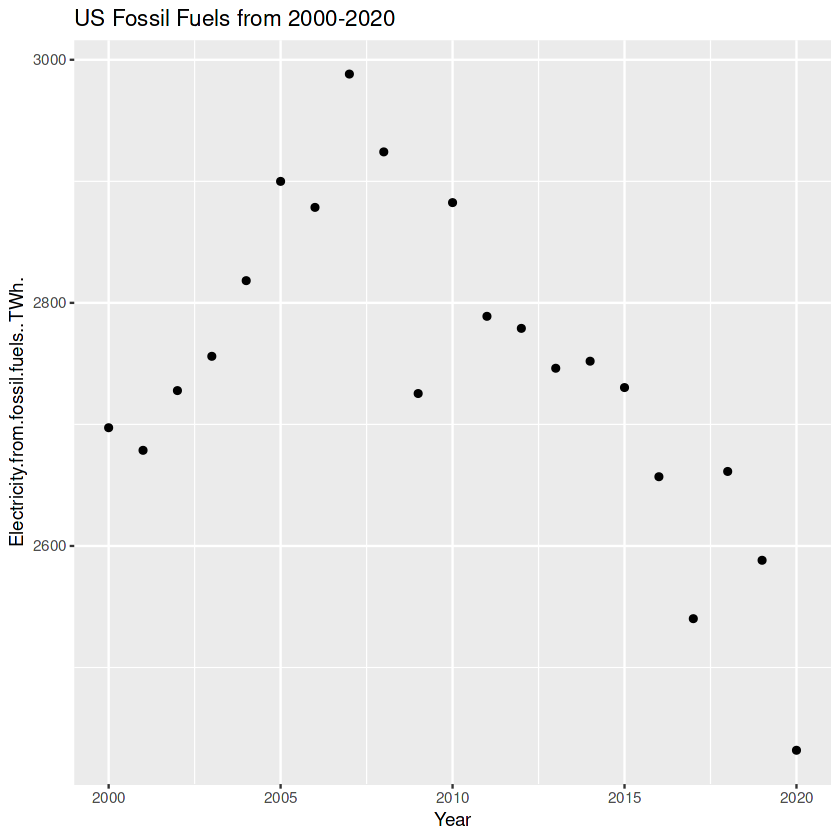

In [9]:
energy <- ggplot(data = united_states_data, aes(x = Year, y = Electricity.from.fossil.fuels..TWh.)) +
  geom_point() + labs(title = "US Fossil Fuels from 2000-2020")

print(energy)

In [10]:
#This shows the US fossil fuel usage is going down

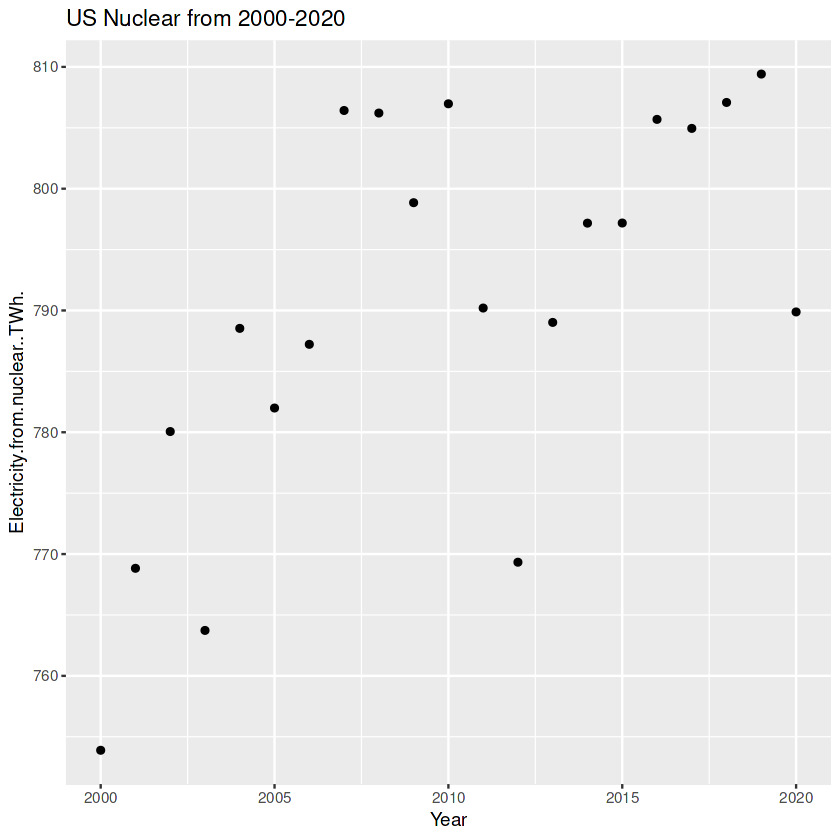

In [11]:
energy <- ggplot(data = united_states_data, aes(x = Year, y = Electricity.from.nuclear..TWh.)) +
  geom_point() + labs(title = "US Nuclear from 2000-2020")

print(energy)

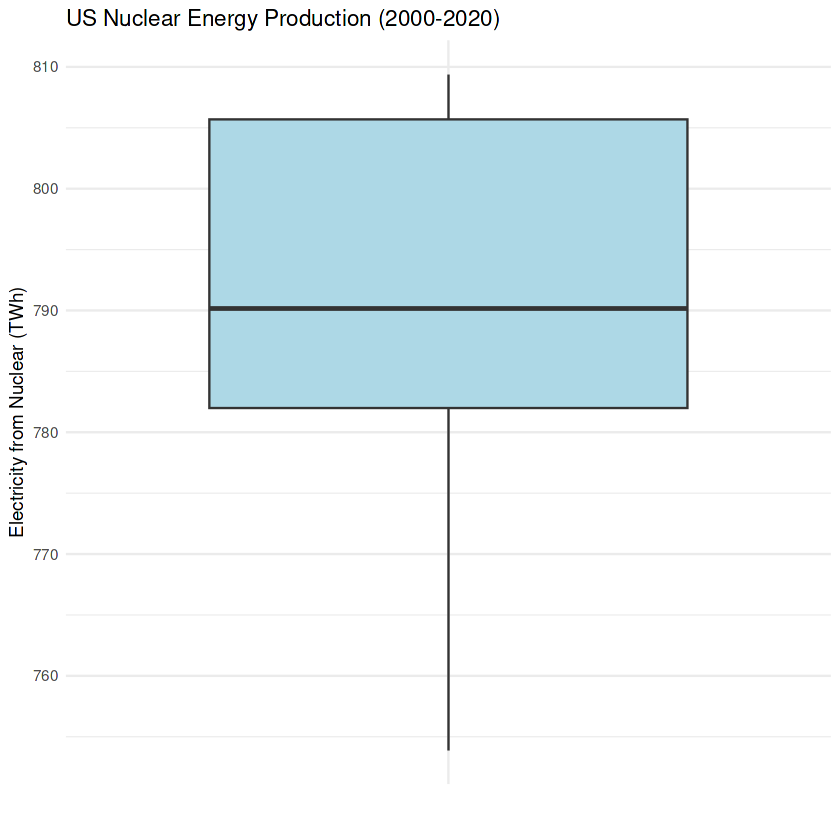

In [12]:
# Looks like there may be some outliers. A boxplot will help determine that

energy_boxplot <- ggplot(data = united_states_data, aes(x = "", y = Electricity.from.nuclear..TWh.)) +
  geom_boxplot(fill = "lightblue") + 
  labs(title = "US Nuclear Energy Production (2000-2020)",
       y = "Electricity from Nuclear (TWh)",
       x = "") +  
  theme_minimal()


print(energy_boxplot)


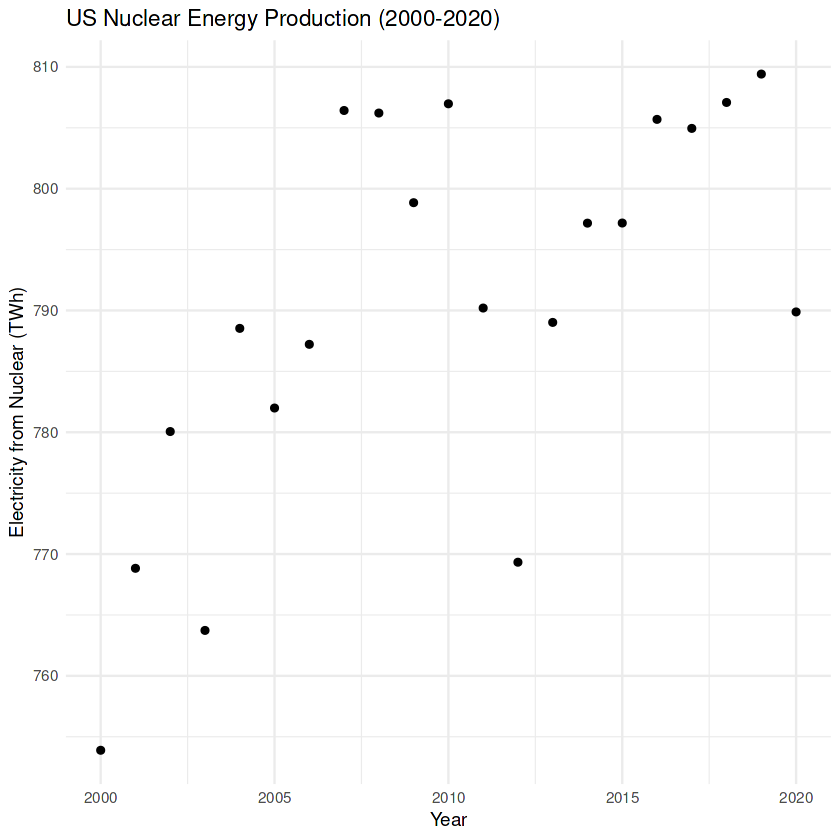

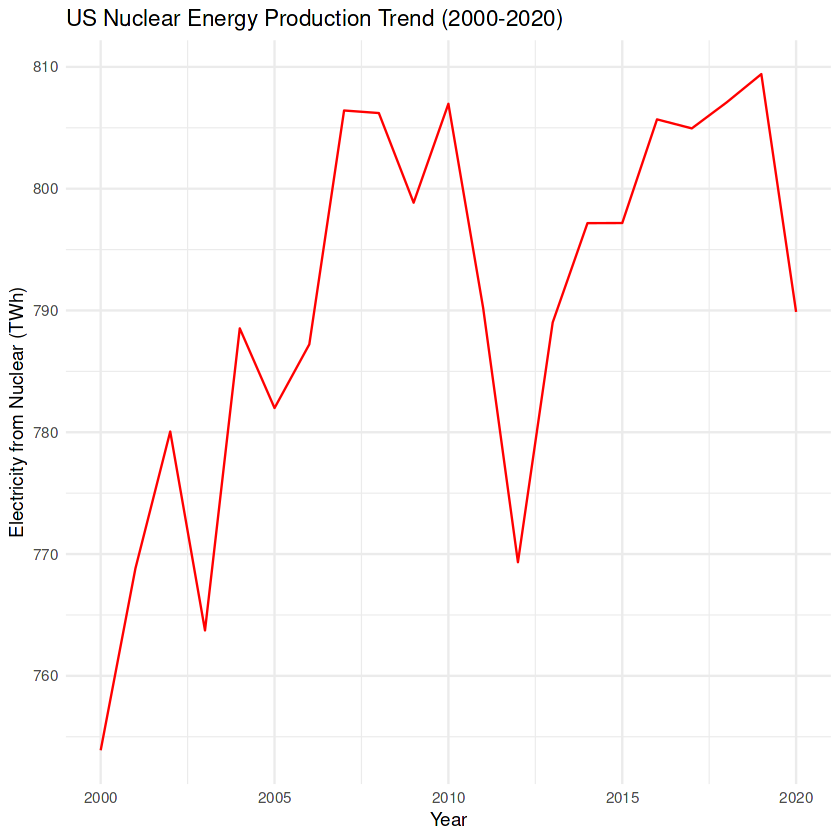

In [13]:
# Removing outliers and replotting to get a better outlook

Q1 <- quantile(united_states_data$Electricity.from.nuclear..TWh., 0.25)
Q3 <- quantile(united_states_data$Electricity.from.nuclear..TWh., 0.75)
IQR <- Q3 - Q1
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR


cleaned_data <- united_states_data %>%
  filter(Electricity.from.nuclear..TWh. >= lower_bound & Electricity.from.nuclear..TWh. <= upper_bound)


energy_scatterplot <- ggplot(data = cleaned_data, aes(x = Year, y = Electricity.from.nuclear..TWh.)) +
  geom_point() + 
  labs(title = "US Nuclear Energy Production (2000-2020)",
       y = "Electricity from Nuclear (TWh)",
       x = "Year") +
  theme_minimal()

print(energy_scatterplot)


line_graph <- ggplot(data = cleaned_data, aes(x = Year, y = Electricity.from.nuclear..TWh.)) +
  geom_line(color = "red") + 
  labs(title = "US Nuclear Energy Production Trend (2000-2020)",
       y = "Electricity from Nuclear (TWh)",
       x = "Year") +
  theme_minimal()

print(line_graph)


In [14]:
#This shows the US Nuclear production has been up and down throughout the years

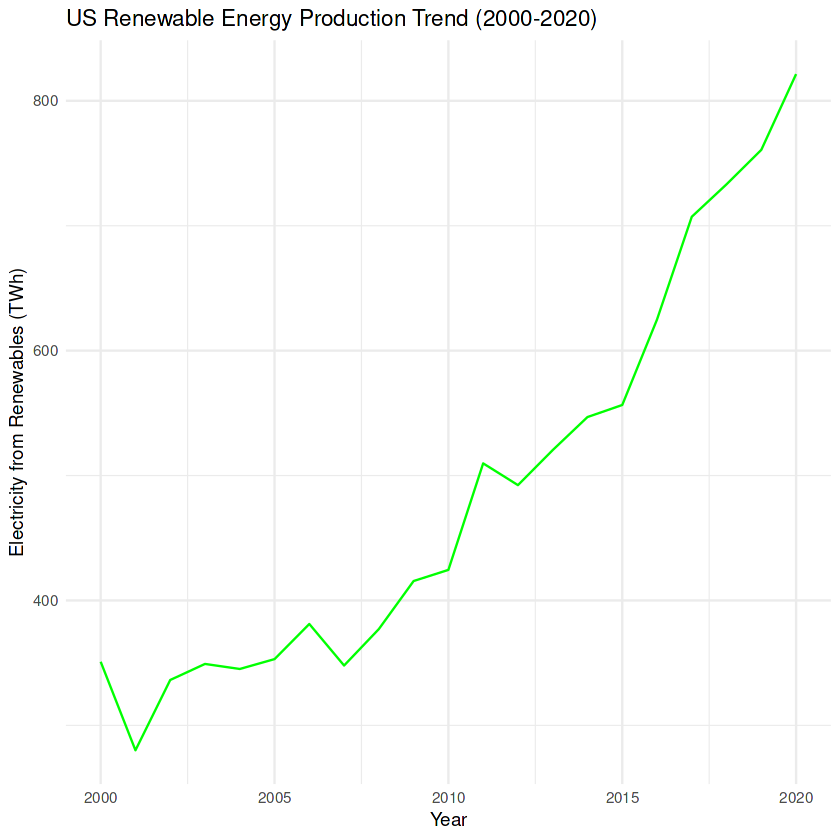

In [15]:
line_graph <- ggplot(data = cleaned_data, aes(x = Year, y = Electricity.from.renewables..TWh.)) +
  geom_line(color = "green") + 
  labs(title = "US Renewable Energy Production Trend (2000-2020)",
       y = "Electricity from Renewables (TWh)",
       x = "Year") +
  theme_minimal()

print(line_graph)

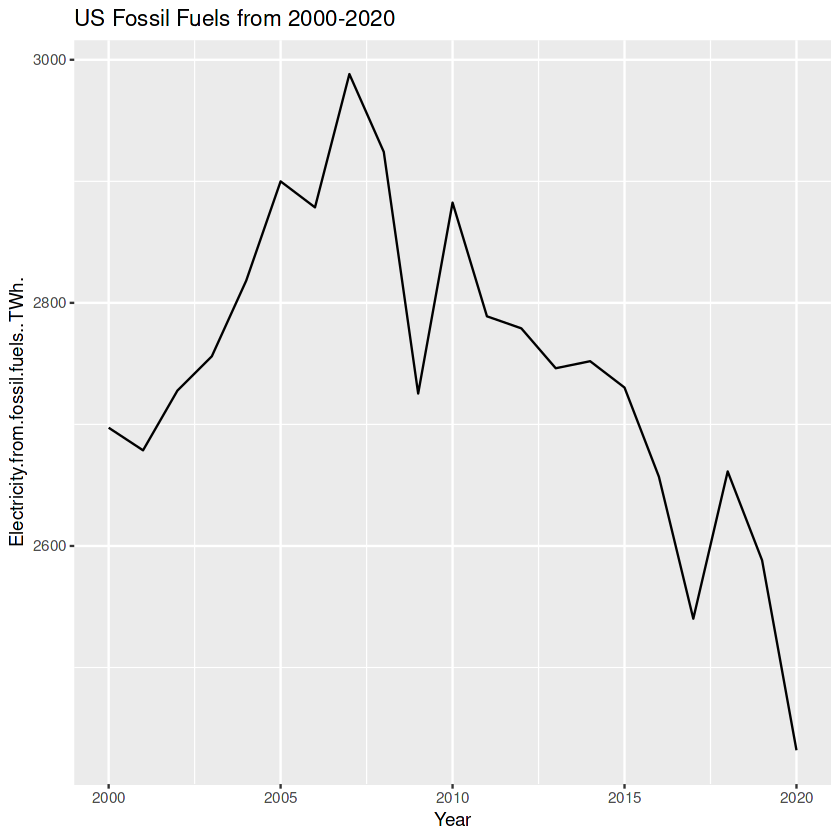

In [16]:
line_graph <- ggplot(data = united_states_data, aes(x = Year, y = Electricity.from.fossil.fuels..TWh.)) +
  geom_line(color = "black") + labs(title = "US Fossil Fuels from 2000-2020")

print(line_graph)

In [17]:
#Last two graph show clearly that the US fossil fuel production over the last 20 years has gone down while the renewable energy has skyrocketed, and nuclear has bounced around.